In [ ]:
import pandas as pd
import numpy as np
from struct import *
import base64

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

##**Import data from google drive**

In [ ]:
link = "https://drive.google.com/file/d/1renGE6IiGKZaQMwsejVaX8Ckgspfgmre/view?usp=sharing"
fluff, id = link.split('d/')
id, fluff = id.split('/view?')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
cap_data = pd.read_csv('Filename.csv',header=None)

##**Decode header and sort by type into independent dataframes**

In [ ]:
def decodeString(input):
  return base64.b64decode(input)

#   C DEFINITION
#
# typedef struct PacketHeaders{
#   uint16_t packetType;
#   uint16_t packetID;
#   uint32_t msFromStart;
#   uint32_t epoch;
#   uint32_t payloadLength;
#   uint32_t reserved[5];
# }PacketHeader;

headerTypes = "HHIIIIIIII"
size_of_header = calcsize(headerTypes)
headerLabels = ["packetType","packetID","msFromStart","epoch","payloadLength","res0","res1","res2","res3", "res4"]
def decodeHeader(input):
  packetType, packetID, msFromStart, epoch, payloadLength, res0, res1, res2, res3, res4 = unpack(headerTypes,input[:size_of_header])
  return packetType, packetID, msFromStart, epoch, payloadLength, res0, res1, res2, res3, res4

In [ ]:
cap_data["decoded"] = cap_data[1].apply(decodeString)

In [ ]:
cap_data["decoded_header"]=cap_data["decoded"].apply(decodeHeader)
cap_header_data = cap_data["decoded_header"].apply(pd.Series)
cap_header_data.columns = headerLabels
cap_data = cap_data.join(cap_header_data)
cap_data.head()

,0,1,decoded,decoded_header,packetType,packetID,msFromStart,epoch,payloadLength,res0,res1,res2,res3,res4
0,2022-03-10 16:00:52,CQCqAPFiAQAAAAAAkAEAAAAAAAAAAAAAAAAAAAAAAAAAAA...,b'\t\x00\xaa\x00\xf1b\x01\x00\x00\x00\x00\x00\...,"(9, 170, 90865, 0, 400, 0, 0, 0, 0, 0)",9,170,90865,0,400,0,0,0,0,0
1,2022-03-10 16:00:52,BwBpAEFjAQAAAAAAkAEAAAAAAAAAAAAAAAAAAAAAAAAAAA...,b'\x07\x00i\x00Ac\x01\x00\x00\x00\x00\x00\x90\...,"(7, 105, 90945, 0, 400, 0, 0, 0, 0, 0)",7,105,90945,0,400,0,0,0,0,0
2,2022-03-10 16:00:53,BQD5AM5hAQAAAAAAkAEAAAAAAAAAAAAAAAAAAAAAAAAAAA...,b'\x05\x00\xf9\x00\xcea\x01\x00\x00\x00\x00\x0...,"(5, 249, 90574, 0, 400, 0, 0, 0, 0, 0)",5,249,90574,0,400,0,0,0,0,0
3,2022-03-10 16:00:53,BQD6AF5jAQAAAAAAkAEAAAAAAAAAAAAAAAAAAAAAAAAAAA...,b'\x05\x00\xfa\x00^c\x01\x00\x00\x00\x00\x00\x...,"(5, 250, 90974, 0, 400, 0, 0, 0, 0, 0)",5,250,90974,0,400,0,0,0,0,0
4,2022-03-10 16:00:53,BQD7ACZkAQAAAAAAyAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,b'\x05\x00\xfb\x00&d\x01\x00\x00\x00\x00\x00\x...,"(5, 251, 91174, 0, 200, 0, 0, 0, 0, 0)",5,251,91174,0,200,0,0,0,0,0


**Packet Types are as follows**
5.   BLINK
6.   THERMAL
7.   ACCELEROMETER
8.   MAGNETOMETER
9.   GYROSCOPE

In [ ]:
raw_blink_df = cap_data[cap_data["packetType"] == 5].reset_index(drop=True)
raw_thermal_df = cap_data[cap_data["packetType"] == 6].reset_index(drop=True)
raw_acc_df = cap_data[cap_data["packetType"] == 7].reset_index(drop=True)
raw_gyro_df = cap_data[cap_data["packetType"] == 9].reset_index(drop=True)

print("Blink entries:\t" + str(len(raw_blink_df)))
print("Thermal entries:\t" + str(len(raw_thermal_df)))
print("Accel entries:\t" + str(len(raw_acc_df)))
print("Gyro entries:\t" + str(len(raw_gyro_df)))

Blink entries:	252
Thermal entries:	21
Accel entries:	104
Gyro entries:	167


In [ ]:
raw_blink_df.head()

,0,1,decoded,decoded_header,packetType,packetID,msFromStart,epoch,payloadLength,res0,res1,res2,res3,res4
0,2022-03-10 16:00:53,BQD5AM5hAQAAAAAAkAEAAAAAAAAAAAAAAAAAAAAAAAAAAA...,b'\x05\x00\xf9\x00\xcea\x01\x00\x00\x00\x00\x0...,"(5, 249, 90574, 0, 400, 0, 0, 0, 0, 0)",5,249,90574,0,400,0,0,0,0,0
1,2022-03-10 16:00:53,BQD6AF5jAQAAAAAAkAEAAAAAAAAAAAAAAAAAAAAAAAAAAA...,b'\x05\x00\xfa\x00^c\x01\x00\x00\x00\x00\x00\x...,"(5, 250, 90974, 0, 400, 0, 0, 0, 0, 0)",5,250,90974,0,400,0,0,0,0,0
2,2022-03-10 16:00:53,BQD7ACZkAQAAAAAAyAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,b'\x05\x00\xfb\x00&d\x01\x00\x00\x00\x00\x00\x...,"(5, 251, 91174, 0, 200, 0, 0, 0, 0, 0)",5,251,91174,0,200,0,0,0,0,0
3,2022-03-10 16:00:53,BQD8ALZlAQAAAAAAkAEAAAAAAAAAAAAAAAAAAAAAAAAAAA...,b'\x05\x00\xfc\x00\xb6e\x01\x00\x00\x00\x00\x0...,"(5, 252, 91574, 0, 400, 0, 0, 0, 0, 0)",5,252,91574,0,400,0,0,0,0,0
4,2022-03-10 16:00:53,BQD9AEZnAQAAAAAAkAEAAAAAAAAAAAAAAAAAAAAAAAAAAA...,b'\x05\x00\xfd\x00Fg\x01\x00\x00\x00\x00\x00\x...,"(5, 253, 91974, 0, 400, 0, 0, 0, 0, 0)",5,253,91974,0,400,0,0,0,0,0


In [ ]:
# for index, row in raw_acc_df.iterrows():
#   print(row["packetID"])

In [ ]:
# raw_blink_df.plot(y="packetID")
for index, row in raw_blink_df.iterrows():
  print(row["packetID"])
  print(row)

249
0                                               2022-03-10 16:00:53
1                 BQD5AM5hAQAAAAAAkAEAAAAAAAAAAAAAAAAAAAAAAAAAAA...
decoded           b'\x05\x00\xf9\x00\xcea\x01\x00\x00\x00\x00\x0...
decoded_header               (5, 249, 90574, 0, 400, 0, 0, 0, 0, 0)
packetType                                                        5
packetID                                                        249
msFromStart                                                   90574
epoch                                                             0
payloadLength                                                   400
res0                                                              0
res1                                                              0
res2                                                              0
res3                                                              0
res4                                                              0
Name: 0, dtype: object
250
0                

Check if any packets dropped

In [ ]:
def packetID_checker(input_df):
  dropped_packets = 0
  pcktID_idx = 0


  for index, row in input_df.iterrows():
    if index == 0:
      pcktID_idx = row["packetID"]
      continue

    delta = row["packetID"] - pcktID_idx

    if delta > 1:
      dropped_packets += 1
    
    pcktID_idx = row["packetID"]

  return dropped_packets

In [ ]:
blink_dropped_packets = packetID_checker(raw_blink_df)
thermal_dropped_packets = packetID_checker(raw_thermal_df)
acc_dropped_packets = packetID_checker(raw_acc_df)
gyro_dropped_packets = packetID_checker(raw_gyro_df)

print("Blink packet dropped rate (%):\t\t " + str(100*blink_dropped_packets/len(raw_blink_df)))
print(" Blink packet count:\t\t\t " + str(len(raw_blink_df)))
print("Thermal packet dropped rate (%):\t " + str(100*thermal_dropped_packets/len(raw_thermal_df)))
print(" Thermal packet count:\t\t\t " + str(len(raw_thermal_df)))
print("Acc packet dropped rate (%):\t\t " + str(100*acc_dropped_packets/len(raw_acc_df)))
print(" Acc packet count:\t\t\t " + str(len(raw_acc_df)))
print("Gyro packet dropped rate (%):\t\t " + str(100*gyro_dropped_packets/len(raw_gyro_df)))
print(" Gyro packet count:\t\t\t " + str(len(raw_gyro_df)))

Blink packet dropped rate (%):		 0.0
 Blink packet count:			 252
Thermal packet dropped rate (%):	 0.0
 Thermal packet count:			 21
Acc packet dropped rate (%):		 0.0
 Acc packet count:			 104
Gyro packet dropped rate (%):		 0.0
 Gyro packet count:			 167


## **Define the structs for each payload type & parse**

**Blink**

In [ ]:
blinkTypes = "B"
size_of_blink = calcsize(blinkTypes)
blinkLabels = ["data"]
blinkSampleRate = 1000 # 1kHz
blinkSamplePeriod_ms = 1000 * (1/blinkSampleRate) # 1 ms

In [ ]:
def parseBlink(input_df):
  length_of_payload = input_df["payloadLength"]
  num_of_blink_samples_in_payload = int(length_of_payload/size_of_blink)

  # remove the header prefix
  payload = input_df["decoded"]
  payload = payload[size_of_header:]

  blink_samples = unpack(str(num_of_blink_samples_in_payload)+blinkTypes, payload)
  new_df = pd.DataFrame(blink_samples, columns=["data"])
  new_df["packetID"] = input_df["packetID"]
  new_df["epoch"] = input_df["epoch"] # not used
  new_df["serverTS"] = input_df[0]
  timeStamps = np.arange(input_df["msFromStart"] - num_of_blink_samples_in_payload * blinkSamplePeriod_ms + 1, input_df["msFromStart"] + 1, blinkSamplePeriod_ms)
  new_df["msFromStart"] = timeStamps.astype(int)
  new_df["saturated"] = input_df["res0"] # if 1, the emitter is off because there is too much NIR light in the room which causes sensor to saturate

  return new_df

In [ ]:
blink_df = pd.DataFrame()
for index, row in raw_blink_df.iterrows():
  blink_df = blink_df.append(parseBlink(row))

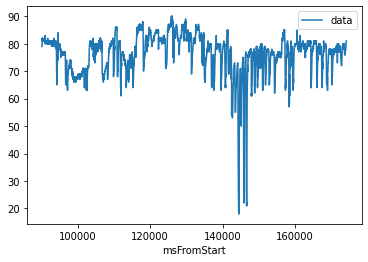

In [ ]:
blink_df.plot(x='msFromStart', y="data")

**Accelerometer & Gyroscope**

In [ ]:
threeAxisTypes = "HHHII"
size_of_threeAxis = calcsize(threeAxisTypes)
threeAxisLabels = ["x","y","z","imu_tick_ms","tick_ms"]

In [ ]:
def parseThreeAxis(input_df):
  length_of_payload = input_df["payloadLength"]
  num_of_three_axis_samples_in_payload = int(length_of_payload/size_of_threeAxis)

  # remove the header prefix
  payload = input_df["decoded"]
  payload = payload[size_of_header:]

  new_df = pd.DataFrame(columns=threeAxisLabels)
  for i in range(num_of_three_axis_samples_in_payload):
    three_axis_samples = unpack(threeAxisTypes, payload[i*size_of_threeAxis:(i+1)*size_of_threeAxis])
    if(three_axis_samples[-1]>=300000000): # an error was found where some samples are corrupted so skipping them
      print("Corrupted sample found:")
      print(three_axis_samples)
      continue 
    df_length = len(new_df)
    new_df.loc[df_length] = three_axis_samples

  new_df["serverTS"] = input_df[0]
  new_df["msFromStart"] = input_df["msFromStart"]
  return new_df

In [ ]:
acc_df = pd.DataFrame()
for index, row in raw_acc_df.iterrows():
  acc_df = acc_df.append(parseThreeAxis(row))
acc_df = acc_df.reset_index()

In [ ]:
acc_sample_rate = 1000 * len(acc_df) / (acc_df.at[len(acc_df)-1,"tick_ms"] - acc_df.at[0,"tick_ms"])
print("Acc sample rate: " + str(acc_sample_rate))

Acc sample rate: 30.866762432775754


In [ ]:
acc_df

,index,x,y,z,imu_tick_ms,tick_ms,serverTS,msFromStart
0,0,2431,65344,170,10,90170,2022-03-10 16:00:52,90945
1,1,2451,65305,170,5,90201,2022-03-10 16:00:52,90945
2,2,2460,65276,190,40,90241,2022-03-10 16:00:52,90945
3,3,2470,65246,200,5,90266,2022-03-10 16:00:52,90945
4,4,2480,65237,200,20,90301,2022-03-10 16:00:52,90945
...,...,...,...,...,...,...,...,...
2595,20,2411,65148,347,7,174274,2022-03-10 16:01:34,174411
2596,21,2421,65139,376,51,174316,2022-03-10 16:01:34,174411
2597,22,2441,65129,396,3,174340,2022-03-10 16:01:34,174411
2598,23,2431,65119,405,31,174376,2022-03-10 16:01:34,174411


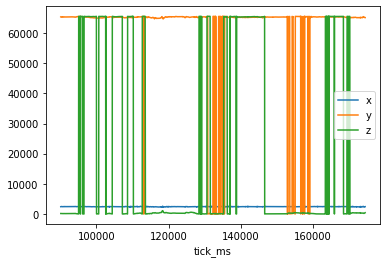

In [ ]:
acc_df.plot(x="tick_ms",y=["x","y","z"])

In [ ]:
gyro_df = pd.DataFrame()
for index, row in raw_gyro_df.iterrows():
  gyro_df = gyro_df.append(parseThreeAxis(row))
gyro_df = gyro_df.reset_index()

In [ ]:
gyro_sample_rate = 1000 * len(gyro_df) / (gyro_df.at[len(gyro_df)-1,"tick_ms"] - gyro_df.at[0,"tick_ms"])
print("Gyro sample rate: " + str(gyro_sample_rate))

Gyro sample rate: 49.82397517751656


In [ ]:
gyro_df

,index,x,y,z,imu_tick_ms,tick_ms,serverTS,msFromStart
0,0,65526,65513,65500,23,90393,2022-03-10 16:00:52,90865
1,1,65533,65502,65483,20,90412,2022-03-10 16:00:52,90865
2,2,5,65498,65475,21,90434,2022-03-10 16:00:52,90865
3,3,12,65495,65471,21,90453,2022-03-10 16:00:52,90865
4,4,16,65499,65477,21,90473,2022-03-10 16:00:52,90865
...,...,...,...,...,...,...,...,...
4170,20,51,65481,65533,23,174108,2022-03-10 16:01:34,174189
4171,21,50,65501,14,21,174128,2022-03-10 16:01:34,174189
4172,22,41,65527,26,25,174149,2022-03-10 16:01:34,174189
4173,23,33,20,35,21,174169,2022-03-10 16:01:34,174189


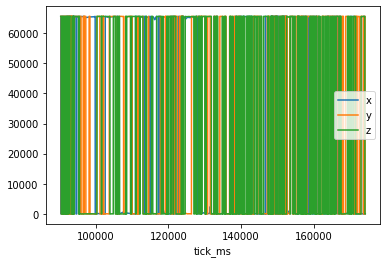

In [ ]:
gyro_df.plot(x="tick_ms",y=["x","y","z"])

In [ ]:
gyro_df.head()

,index,x,y,z,imu_tick_ms,tick_ms,serverTS,msFromStart
0,0,65526,65513,65500,23,90393,2022-03-10 16:00:52,90865
1,1,65533,65502,65483,20,90412,2022-03-10 16:00:52,90865
2,2,5,65498,65475,21,90434,2022-03-10 16:00:52,90865
3,3,12,65495,65471,21,90453,2022-03-10 16:00:52,90865
4,4,16,65499,65477,21,90473,2022-03-10 16:00:52,90865


In [ ]:
gyro_df.iloc[-1]

index                           24
x                               25
y                               47
z                               40
imu_tick_ms                     23
tick_ms                     174188
serverTS       2022-03-10 16:01:34
msFromStart                 174189
Name: 4174, dtype: object

**Thermal** (use secondary processor tick_ms because thats the most accurate for each sample but I did do some interpolation for tick_ms to roughly sync up)

In [ ]:
# struct thermopileData {
# 	uint16_t thermopile;
# 	uint16_t thermistor;
# 	uint32_t tick_ms;
# };

# struct thermopilePackagedData {
# 	struct thermopileData temple[5];
# 	struct thermopileData nose[5];
# };

# struct secondaryProcessorData {
# 	struct thermopilePackagedData temp;
# 	uint32_t tick_ms;
# 	uint32_t epoch;
# };

tempTypes = "HHI"
tempSuffixTypes = "II"
tempPacketType = tempTypes * 5 + tempTypes * 5 + tempSuffixTypes
size_of_tempPacketType = calcsize(tempPacketType)
tempLabels = ["temple_tp","temple_thermistor","secondary_temple_tick_ms","nose_tp","nose_thermistor","secondary_nose_tick_ms","tick_ms","epoch"]
tempSuffixLabels = ["tick_ms","epoch"]
tempSamplePeriod_ms = 100

In [ ]:
def parseThermal(input_df):
  length_of_payload = input_df["payloadLength"]
  num_of_thermal_samples_in_payload = int(length_of_payload/size_of_tempPacketType)

  # remove the header prefix
  payload = input_df["decoded"]
  payload = payload[size_of_header:]

  corePacketLength = 6

  new_df = pd.DataFrame(columns=tempLabels)
  indicies = np.array([0,1,2,3,4,5,6,7])

  for i in range(num_of_thermal_samples_in_payload):
    thermal_samples = np.array(unpack(tempPacketType, payload[i*size_of_tempPacketType:i*size_of_tempPacketType+size_of_tempPacketType]))
    for j in range(5):
      df_length = len(new_df)
      new_indicie = indicies + corePacketLength * j
      new_indicie[-2] = -2
      new_indicie[-1] = -1
      new_df.loc[df_length] = thermal_samples[new_indicie]
      new_df.at[df_length,"tick_ms"] =  new_df.at[df_length,"tick_ms"] - (4-j) * tempSamplePeriod_ms
  
  new_df["serverTS"] = input_df[0]

  return(new_df)

In [ ]:
thermal_df = pd.DataFrame()
for index, row in raw_thermal_df.iterrows():
  thermal_df = thermal_df.append(parseThermal(row))

In [ ]:
thermal_df.head()

,temple_tp,temple_thermistor,secondary_temple_tick_ms,nose_tp,nose_thermistor,secondary_nose_tick_ms,tick_ms,epoch,serverTS
0,2766,1911,44427,2763,1908,44527,44433,946684853,2022-03-10 16:00:53
1,2760,1918,44627,2759,1903,44727,44533,946684853,2022-03-10 16:00:53
2,2763,1907,44827,2640,1872,44383,44633,946684853,2022-03-10 16:00:53
3,2659,1869,44477,2661,1870,44577,44733,946684853,2022-03-10 16:00:53
4,2618,1870,44677,2650,1870,44777,44833,946684853,2022-03-10 16:00:53


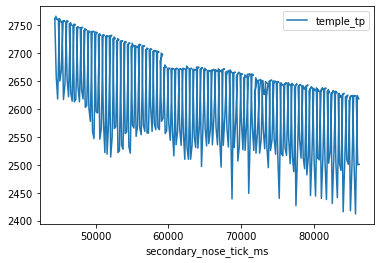

In [ ]:
thermal_df.plot(x="secondary_nose_tick_ms",y="temple_tp")

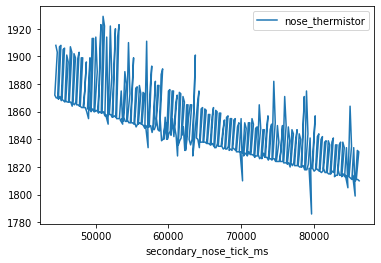

In [ ]:
thermal_df.plot(x="secondary_nose_tick_ms",y="nose_thermistor")

##**Data Analysis Pipeline**

---

